<a href="https://colab.research.google.com/github/sazapatac1/covid19-bigdata/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 3 - Covid19

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.6.tgz
!tar xf spark-2.4.5-bin-hadoop2.6.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.6"
import matplotlib.pyplot as plt
import pandas as pd
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [4]:
!wget https://raw.githubusercontent.com/sazapatac1/covid19-bigdata/master/datasets/Casos_positivos_de_COVID-19_en_Colombia.csv
!wget https://raw.githubusercontent.com/sazapatac1/covid19-bigdata/master/datasets/time_series_covid19_confirmed_global_narrow.csv
!wget https://raw.githubusercontent.com/sazapatac1/covid19-bigdata/master/datasets/time_series_covid19_deaths_global_narrow.csv
!wget https://raw.githubusercontent.com/sazapatac1/covid19-bigdata/master/datasets/time_series_covid19_recovered_global_narrow.csv

--2020-05-17 15:46:43--  https://raw.githubusercontent.com/sazapatac1/covid19-bigdata/master/datasets/Casos_positivos_de_COVID-19_en_Colombia.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2421869 (2.3M) [text/plain]
Saving to: ‘Casos_positivos_de_COVID-19_en_Colombia.csv’

Casos_positivos_de_ 100%[===================>]   2.31M  --.-KB/s    in 0.08s   

2020-05-17 15:46:44 (30.6 MB/s) - ‘Casos_positivos_de_COVID-19_en_Colombia.csv’ saved [2421869/2421869]

--2020-05-17 15:46:45--  https://raw.githubusercontent.com/sazapatac1/covid19-bigdata/master/datasets/time_series_covid19_confirmed_global_narrow.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.co

# Ingesta y Almacenamiento de datos

In [0]:
# Load csv Dataset 
dfColombia=spark.read.csv('Casos_positivos_de_COVID-19_en_Colombia.csv',inferSchema=True,header=True)
dfGlobalConfirmed=spark.read.csv('time_series_covid19_confirmed_global_narrow.csv',inferSchema=True,header=True)
dfGlobalDeath=spark.read.csv('time_series_covid19_deaths_global_narrow.csv',inferSchema=True,header=True)
dfGlobalRecovered=spark.read.csv('time_series_covid19_recovered_global_narrow.csv',inferSchema=True,header=True)

# Procesamiento: Análisis exploratorio de datos con pyspark

**Exploratiorio en Colombia**

In [0]:
dfColombia.columns

['ID de caso',
 'Fecha de notificación',
 'Codigo DIVIPOLA',
 'Ciudad de ubicación',
 'Departamento o Distrito ',
 'atención',
 'Edad',
 'Sexo',
 'Tipo',
 'Estado',
 'País de procedencia',
 'FIS',
 'Fecha de muerte',
 'Fecha diagnostico',
 'Fecha recuperado',
 'fecha reporte web']

In [0]:
dfColombia.show(5)

+----------+---------------------+---------------+-------------------+------------------------+----------+----+----+-----------+----------+-------------------+--------------------+---------------+-------------------+--------------------+-------------------+
|ID de caso|Fecha de notificación|Codigo DIVIPOLA|Ciudad de ubicación|Departamento o Distrito |  atención|Edad|Sexo|       Tipo|    Estado|País de procedencia|                 FIS|Fecha de muerte|  Fecha diagnostico|    Fecha recuperado|  fecha reporte web|
+----------+---------------------+---------------+-------------------+------------------------+----------+----+----+-----------+----------+-------------------+--------------------+---------------+-------------------+--------------------+-------------------+
|         1|  2020-03-02 00:00:00|          11001|        Bogotá D.C.|             Bogotá D.C.|Recuperado|  19|   F|  Importado|Recuperado|             Italia|2020-02-27T00:00:...|          -   -|2020-03-06 00:00:00|2020-03-13

In [0]:
#Confirmed cases Colombia with national dataset
dfColombia.count()

12930

In [0]:
#Cases by gender - Colombia
dfColombia.groupBy('Sexo').count().show()

+----+-----+
|Sexo|count|
+----+-----+
|   F| 5637|
|   M| 7293|
+----+-----+



In [0]:
#Cases by state - Colombia
dfColombia.groupBy('Departamento o Distrito ').count().orderBy('count',ascending=False).show(34)

+------------------------+-----+
|Departamento o Distrito |count|
+------------------------+-----+
|             Bogotá D.C.| 4685|
|         Valle del Cauca| 1393|
|                    Meta|  938|
|     Cartagena D.T. y C.|  874|
|                Amazonas|  871|
|               Atlántico|  641|
|       Barranquilla D.E.|  627|
|               Antioquia|  491|
|                  Nariño|  338|
|            Cundinamarca|  311|
|               Risaralda|  233|
|    Santa Marta D.T. ...|  205|
|                   Huila|  187|
|                  Tolima|  134|
|               Magdalena|  117|
|                  Caldas|  104|
|      Norte de Santander|  104|
|                  Boyacá|   87|
|       Buenaventura D.E.|   85|
|                 Quindio|   78|
|                   Cesar|   72|
|                 Bolívar|   62|
|                   Cauca|   54|
|                 Córdoba|   42|
|               Santander|   42|
|                   Chocó|   40|
|              La Guajira|   32|
|         

In [0]:
#Cases by town - Colombia
dfColombia.groupBy('Ciudad de ubicación').count().orderBy('count',ascending=False).show(34)

+--------------------+-----+
| Ciudad de ubicación|count|
+--------------------+-----+
|         Bogotá D.C.| 4685|
|                Cali| 1173|
|       Villavicencio|  911|
| Cartagena de Indias|  874|
|             Leticia|  870|
|        Barranquilla|  627|
|             Soledad|  402|
|            Medellín|  319|
|         Santa Marta|  205|
|             Pereira|  163|
|San Andrés de Tumaco|  160|
|              Ibagué|  120|
|             Ipiales|  107|
|               Neiva|  107|
|              Soacha|  102|
|             Malambo|   91|
|        Buenaventura|   85|
|              Cúcuta|   79|
|        Dosquebradas|   65|
|             Ciénaga|   63|
|        Sabanagrande|   57|
|           La Dorada|   54|
|             Armenia|   54|
|             Palmira|   53|
|          Valledupar|   52|
|               Bello|   50|
|               Pasto|   44|
|               Chocó|   40|
|         Puebloviejo|   39|
|                Chía|   31|
|             Jamundí|   29|
|             

In [0]:
#Cases by condition
#Currently infected - Colombia

dfColombia.groupBy('Estado').count().show()
print("Infected:")
dfColombia.filter((dfColombia['Estado']=='Grave')|(dfColombia['Estado'] == 'Leve')|(dfColombia['Estado'] == 'Asintomático')|(dfColombia['Estado'] == 'Moderado')).count()

+------------+-----+
|      Estado|count|
+------------+-----+
|        null|   10|
|   Fallecido|  508|
|    Moderado|  696|
|Asintomático| 1423|
|  Recuperado| 3133|
|        Leve| 7030|
|       Grave|  130|
+------------+-----+

Infected:


9279

In [0]:
#Condition by age - Colombia
dfColombia.groupBy('Edad','Estado').count().orderBy('Edad', ascending=True).show()

+----+------------+-----+
|Edad|      Estado|count|
+----+------------+-----+
|   0|   Fallecido|    3|
|   0|       Grave|    5|
|   0|  Recuperado|   13|
|   0|        Leve|   38|
|   0|    Moderado|   20|
|   0|Asintomático|    3|
|   0|        null|    1|
|   1|  Recuperado|   13|
|   1|Asintomático|    5|
|   1|        Leve|   37|
|   1|    Moderado|    2|
|   2|  Recuperado|   11|
|   2|    Moderado|    4|
|   2|        Leve|   28|
|   2|Asintomático|    8|
|   3|    Moderado|    3|
|   3|  Recuperado|    9|
|   3|       Grave|    1|
|   3|        Leve|   30|
|   3|   Fallecido|    2|
+----+------------+-----+
only showing top 20 rows



In [0]:
#Cases by type - Colombia
dfColombia.groupBy('Tipo').count().show()

+-----------+-----+
|       Tipo|count|
+-----------+-----+
|Relacionado| 3859|
|  Importado|  840|
| En Estudio| 8231|
+-----------+-----+



In [0]:
#Cases by atention - Colombia
dfColombia.groupBy('atención').count().show()

+------------+-----+
|    atención|count|
+------------+-----+
|Hospital UCI|  131|
|   Fallecido|  509|
|        Casa| 8449|
|    Hospital|  698|
|         N/A|   10|
|  Recuperado| 3133|
+------------+-----+



In [0]:
# Cases by origin country - Colombia
dfColombia.groupBy('País de procedencia').count().orderBy('count', ascending=False).show()

+--------------------+-----+
| País de procedencia|count|
+--------------------+-----+
|            Colombia|12084|
|              España|  259|
|Estados Unidos de...|  217|
|             Ecuador|   50|
|              México|   49|
|              Brasil|   37|
|              Panamá|   34|
|             Turquía|   28|
|             Francia|   16|
|             Jamaica|   16|
|         Reino Unido|   14|
|         Puerto Rico|   13|
|                Perú|   12|
|              Egipto|   11|
|            Alemania|   10|
|República Dominicana|   10|
|              Italia|    9|
|San Martín (Francia)|    7|
|              Israel|    6|
|           Venezuela|    4|
+--------------------+-----+
only showing top 20 rows



**Exploratorio a nivel mundial**

In [43]:
#Global dataset

#cast value column to int
dfGlobalConfirmed = dfGlobalConfirmed.withColumn("Value", dfGlobalConfirmed["Value"].cast("int"))
dfGlobalDeath = dfGlobalDeath.withColumn("Value", dfGlobalDeath["Value"].cast("int"))
dfGlobalRecovered = dfGlobalRecovered.withColumn("Value", dfGlobalRecovered["Value"].cast("int"))
dfGlobalConfirmed.columns

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 'Date',
 'Value',
 'ISO 3166-1 Alpha 3-Codes',
 'Region Code',
 'Sub-region Code',
 'Intermediate Region Code']

In [44]:
dfGlobalConfirmed.show(5)

+--------------+--------------+--------+--------+----------+-----+------------------------+-----------------+----------------+------------------------+
|Province/State|Country/Region|     Lat|    Long|      Date|Value|ISO 3166-1 Alpha 3-Codes|      Region Code| Sub-region Code|Intermediate Region Code|
+--------------+--------------+--------+--------+----------+-----+------------------------+-----------------+----------------+------------------------+
|    #adm1+name| #country+name|#geo+lat|#geo+lon|     #date| null|           #country+code|#region+main+code|#region+sub+code|    #region+intermedi...|
|          null|   Afghanistan|    33.0|    65.0|2020-05-13| 5226|                     AFG|              142|              34|                    null|
|          null|   Afghanistan|    33.0|    65.0|2020-05-12| 4963|                     AFG|              142|              34|                    null|
|          null|   Afghanistan|    33.0|    65.0|2020-05-11| 4687|                     A

In [45]:
dfGlobalRecovered.show(5)

+--------------+--------------+--------+--------+----------+-----+------------------------+-----------------+----------------+------------------------+
|Province/State|Country/Region|     Lat|    Long|      Date|Value|ISO 3166-1 Alpha 3-Codes|      Region Code| Sub-region Code|Intermediate Region Code|
+--------------+--------------+--------+--------+----------+-----+------------------------+-----------------+----------------+------------------------+
|    #adm1+name| #country+name|#geo+lat|#geo+lon|     #date| null|           #country+code|#region+main+code|#region+sub+code|    #region+intermedi...|
|          null|   Afghanistan|    33.0|    65.0|2020-05-13|  648|                     AFG|              142|              34|                    null|
|          null|   Afghanistan|    33.0|    65.0|2020-05-12|  610|                     AFG|              142|              34|                    null|
|          null|   Afghanistan|    33.0|    65.0|2020-05-11|  558|                     A

In [47]:
dfGlobalDeath.show(5)

+--------------+--------------+--------+--------+----------+-----+------------------------+-----------------+----------------+------------------------+
|Province/State|Country/Region|     Lat|    Long|      Date|Value|ISO 3166-1 Alpha 3-Codes|      Region Code| Sub-region Code|Intermediate Region Code|
+--------------+--------------+--------+--------+----------+-----+------------------------+-----------------+----------------+------------------------+
|    #adm1+name| #country+name|#geo+lat|#geo+lon|     #date| null|           #country+code|#region+main+code|#region+sub+code|    #region+intermedi...|
|          null|   Afghanistan|    33.0|    65.0|2020-05-13|  132|                     AFG|              142|              34|                    null|
|          null|   Afghanistan|    33.0|    65.0|2020-05-12|  127|                     AFG|              142|              34|                    null|
|          null|   Afghanistan|    33.0|    65.0|2020-05-11|  122|                     A

In [48]:
#Confirmed cases Colombia with global dataset
print('Confirmed cases Colombia with global dataset')
dfGlobalConfirmed.filter(dfGlobalConfirmed['Country/Region']=='Colombia').select('Country/Region', 'Value').show(1)

Confirmed cases Colombia with global dataset
+--------------+-----+
|Country/Region|Value|
+--------------+-----+
|      Colombia|12930|
+--------------+-----+
only showing top 1 row



In [49]:
#Death cases Colombia with global dataset
print('Death cases Colombia with global dataset')
dfGlobalDeath.filter(dfGlobalDeath['Country/Region']=='Colombia').select('Country/Region', 'Value').show(1)

Death cases Colombia with global dataset
+--------------+-----+
|Country/Region|Value|
+--------------+-----+
|      Colombia|  509|
+--------------+-----+
only showing top 1 row



In [50]:
#Recovered cases Colombia with global dataset
print('Recovered cases Colombia with global dataset')
dfGlobalRecovered.filter(dfGlobalRecovered['Country/Region']=='Colombia').select('Country/Region', 'Value').show(1)

Recovered cases Colombia with global dataset
+--------------+-----+
|Country/Region|Value|
+--------------+-----+
|      Colombia| 3133|
+--------------+-----+
only showing top 1 row



In [65]:
#Last day dataset infected
dfGlobalConfirmed.filter(dfGlobalConfirmed['Date'] == '2020-05-13').orderBy('Value', ascending=False).show()

+--------------+--------------+--------+-------------------+----------+-------+------------------------+-----------+---------------+------------------------+
|Province/State|Country/Region|     Lat|               Long|      Date|  Value|ISO 3166-1 Alpha 3-Codes|Region Code|Sub-region Code|Intermediate Region Code|
+--------------+--------------+--------+-------------------+----------+-------+------------------------+-----------+---------------+------------------------+
|          null|            US| 37.0902|           -95.7129|2020-05-13|1390406|                     USA|         19|             21|                    null|
|          null|        Russia|    60.0|               90.0|2020-05-13| 242271|                     RUS|        150|            151|                    null|
|          null|United Kingdom| 55.3781|-3.4360000000000004|2020-05-13| 229705|                     GBR|        150|            154|                    null|
|          null|         Spain|    40.0|            

In [52]:
#Last day dataset deaths
dfGlobalDeath.filter(dfGlobalDeath['Date'] == '2020-05-13').orderBy('Value', ascending=False).show()

+--------------+--------------+-------+-------------------+----------+-----+------------------------+-----------+---------------+------------------------+
|Province/State|Country/Region|    Lat|               Long|      Date|Value|ISO 3166-1 Alpha 3-Codes|Region Code|Sub-region Code|Intermediate Region Code|
+--------------+--------------+-------+-------------------+----------+-----+------------------------+-----------+---------------+------------------------+
|          null|            US|37.0902|           -95.7129|2020-05-13|84119|                     USA|         19|             21|                    null|
|          null|United Kingdom|55.3781|-3.4360000000000004|2020-05-13|33186|                     GBR|        150|            154|                    null|
|          null|         Italy|   43.0|               12.0|2020-05-13|31106|                     ITA|        150|             39|                    null|
|          null|         Spain|   40.0|               -4.0|2020-05-13|

In [53]:
#Last day dataset Recovered
dfGlobalRecovered.filter(dfGlobalRecovered['Date'] == '2020-05-13').orderBy('Value', ascending=False).show()

+--------------+--------------+--------+---------+----------+------+------------------------+-----------+---------------+------------------------+
|Province/State|Country/Region|     Lat|     Long|      Date| Value|ISO 3166-1 Alpha 3-Codes|Region Code|Sub-region Code|Intermediate Region Code|
+--------------+--------------+--------+---------+----------+------+------------------------+-----------+---------------+------------------------+
|          null|            US| 37.0902| -95.7129|2020-05-13|243430|                     USA|         19|             21|                    null|
|          null|       Germany|    51.0|      9.0|2020-05-13|148700|                     DEU|        150|            155|                    null|
|          null|         Spain|    40.0|     -4.0|2020-05-13|140823|                     ESP|        150|             39|                    null|
|          null|         Italy|    43.0|     12.0|2020-05-13|112541|                     ITA|        150|             

# 4 Visualización básica de datos


**Situación a nivel mundial**

In [239]:
LAST_DAY = dfGlobalConfirmed.groupBy('Date').count().orderBy('Date', ascending =False).toPandas()['Date'][0]
print(LAST_DAY)

2020-05-13


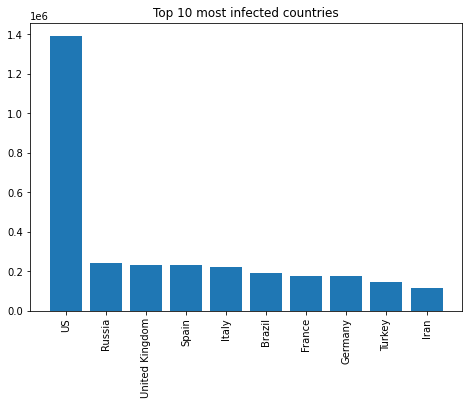

In [242]:
#Top 10 most infected countries
countries = dfGlobalConfirmed.filter(dfGlobalConfirmed['Date'] == LAST_DAY).orderBy('Value', ascending=False).toPandas()[:10]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countries['Country/Region'].values.tolist(),countries['Value'].values.tolist())
ax.set_title('Top 10 most infected countries')
plt.xticks(rotation=90)
plt.show()

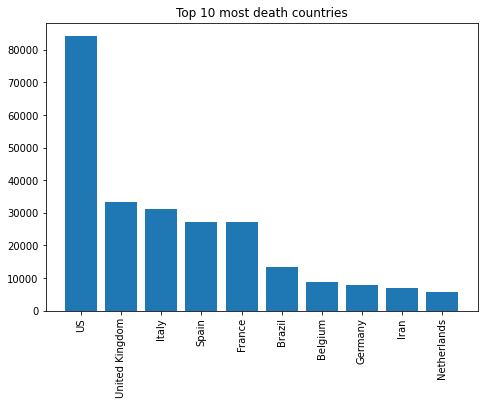

In [243]:
#Top 10 most death countries
countries = dfGlobalDeath.filter(dfGlobalDeath['Date'] ==  LAST_DAY).orderBy('Value', ascending=False).toPandas()[:10]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countries['Country/Region'].values.tolist(),countries['Value'].values.tolist())
ax.set_title('Top 10 most death countries')
plt.xticks(rotation=90)
plt.show()

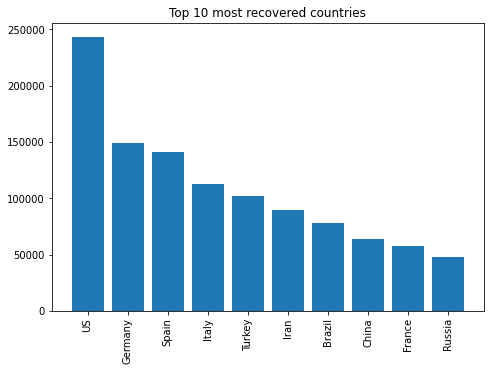

In [244]:
#Top 10 most recovered countries
countries = dfGlobalRecovered.filter(dfGlobalRecovered['Date'] == LAST_DAY).orderBy('Value', ascending=False).toPandas()[:10]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countries['Country/Region'].values.tolist(),countries['Value'].values.tolist())
ax.set_title('Top 10 most recovered countries')
plt.xticks(rotation=90)
plt.show()

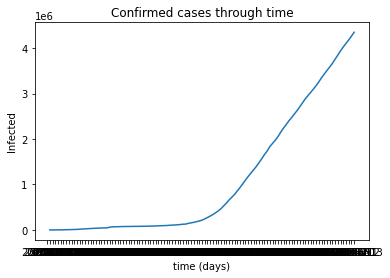

In [125]:
#Confirmed cases through time
fig, ax = plt.subplots()
confirmedByDate = dfGlobalConfirmed.groupBy('Date').sum().orderBy('Date',ascending=True).toPandas()
ax.set(xlabel='time (days)', ylabel='Infected',
       title='Confirmed cases through time')
ax.plot(confirmedByDate['Date'].values.tolist(), confirmedByDate['sum(Value)'].values.tolist())



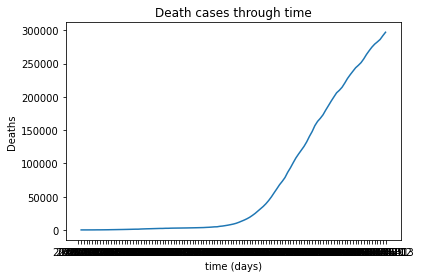

In [90]:
#Death cases through time
fig, ax = plt.subplots()
DeathsByDate = dfGlobalDeath.groupBy('Date').sum().orderBy('Date',ascending=True).toPandas()
ax.set(xlabel='time (days)', ylabel='Deaths',
       title='Death cases through time')
ax.plot(DeathsByDate['Date'].values.tolist(), DeathsByDate['sum(Value)'].values.tolist())

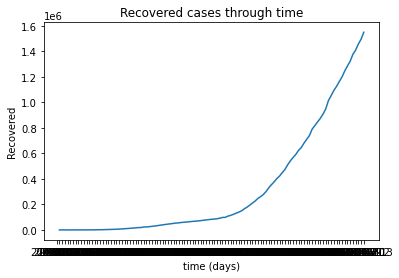

In [106]:
#Recovered cases through time
fig, ax = plt.subplots()
RecoveredByDate = dfGlobalRecovered.groupBy('Date').sum().orderBy('Date',ascending=True).toPandas()
ax.set(xlabel='time (days)', ylabel='Recovered',
       title='Recovered cases through time')
ax.plot(RecoveredByDate['Date'].values.tolist(), RecoveredByDate['sum(Value)'].values.tolist())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

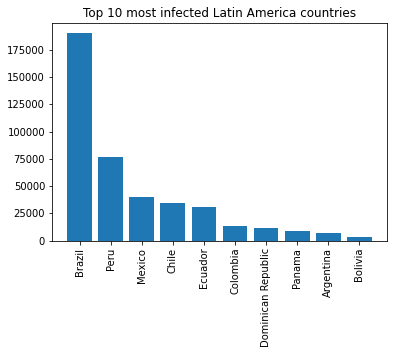

In [279]:
#Top 10 most infected Latin America countries
fig,ax = plt.subplots()
totalInfectedLatinAmericaCountries = dfGlobalConfirmed.filter((dfGlobalConfirmed['Date'] == LAST_DAY)&(dfGlobalConfirmed['Sub-region Code']== 419)).orderBy('Value',ascending=False).select('Country/Region', 'Value').toPandas()[:10]
ax.bar(totalInfectedLatinAmericaCountries['Country/Region'].values.tolist(),totalInfectedLatinAmericaCountries['Value'].values.tolist())
ax.set_title('Top 10 most infected Latin America countries')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

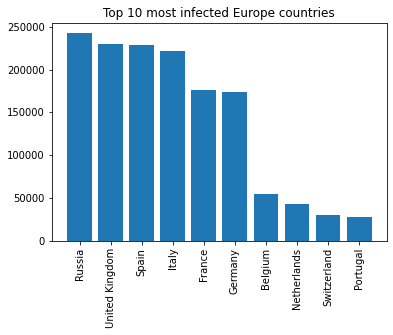

In [278]:
#Top 10 most infected Europe countries
fig,ax = plt.subplots()
totalInfectedLatinAmericaCountries = dfGlobalConfirmed.filter((dfGlobalConfirmed['Date'] == LAST_DAY)&(dfGlobalConfirmed['Region Code']== 150)).orderBy('Value',ascending=False).select('Country/Region', 'Value').toPandas()[:10]
ax.bar(totalInfectedLatinAmericaCountries['Country/Region'].values.tolist(),totalInfectedLatinAmericaCountries['Value'].values.tolist())
ax.set_title('Top 10 most infected Europe countries')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

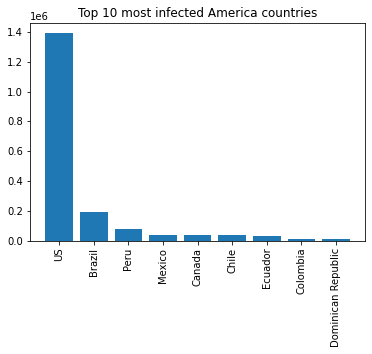

In [277]:
#Top 10 most infected America countries
fig,ax = plt.subplots()
totalInfectedLatinAmericaCountries = dfGlobalConfirmed.filter((dfGlobalConfirmed['Date'] == LAST_DAY)&(dfGlobalConfirmed['Region Code']== 19)).orderBy('Value',ascending=False).select('Country/Region', 'Value').toPandas()[:10]
ax.bar(totalInfectedLatinAmericaCountries['Country/Region'].values.tolist(),totalInfectedLatinAmericaCountries['Value'].values.tolist())
ax.set_title('Top 10 most infected America countries')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

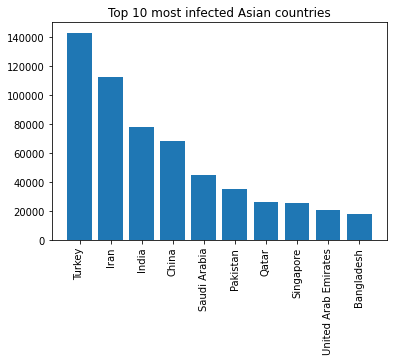

In [276]:
#Top 10 most infected Asian countries
fig,ax = plt.subplots()
totalInfectedLatinAmericaCountries = dfGlobalConfirmed.filter((dfGlobalConfirmed['Date'] == LAST_DAY)&(dfGlobalConfirmed['Region Code']== 142)).orderBy('Value',ascending=False).select('Country/Region', 'Value').toPandas()[:10]
ax.bar(totalInfectedLatinAmericaCountries['Country/Region'].values.tolist(),totalInfectedLatinAmericaCountries['Value'].values.tolist())
ax.set_title('Top 10 most infected Asian countries')
plt.xticks(rotation=90)

**Situación en Colombia**

Text(0.5, 1.0, 'Infected by genre')

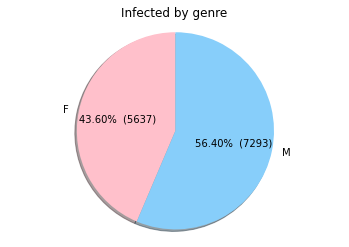

In [171]:
#Infected by genre - Colombia
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig,ax = plt.subplots()
labels = dfColombia.groupBy('Sexo').count().toPandas()['Sexo'].values.tolist()
values = dfColombia.groupBy('Sexo').count().toPandas()['count'].values.tolist()
explode = (0,0)
colors = ['pink','lightskyblue']
ax.pie(values, explode=explode, labels=labels, colors=colors, autopct=make_autopct(values), shadow = True, startangle= 90)
ax.axis('equal')
ax.set_title('Infected by genre')

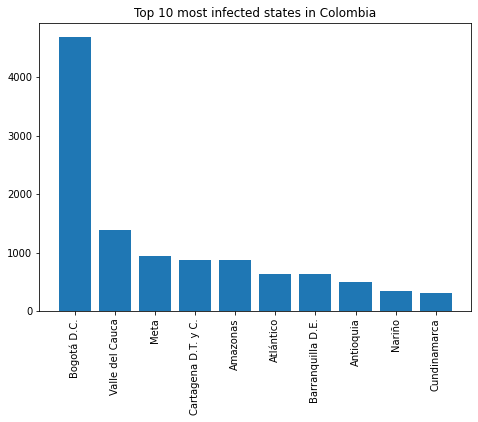

In [56]:
#Top 10 most infected states in Colombia
states = dfColombia.groupBy('Departamento o Distrito ').count().orderBy('count',ascending=False).toPandas()[:10]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(states['Departamento o Distrito '].values.tolist(),states['count'].values.tolist())
ax.set_title('Top 10 most infected states in Colombia')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Infected by condition in Colombia')

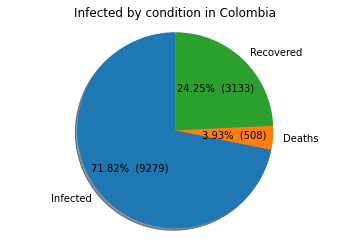

In [0]:
#Infected by condition in Colombia
fig,ax = plt.subplots()
labels = ['Infected', 'Deaths', 'Recovered']
values = []
values.append(dfColombia.filter((dfColombia['Estado']=='Grave')|(dfColombia['Estado'] == 'Leve')|(dfColombia['Estado'] == 'Asintomático')|(dfColombia['Estado'] == 'Moderado')).count())
values.append(dfColombia.filter(dfColombia['Estado']=='Fallecido').count())
values.append(dfColombia.filter(dfColombia['Estado']=='Recuperado').count())
explode = (0,0,0)
ax.pie(values, explode=explode, labels=labels, autopct=make_autopct(values), shadow = True, startangle= 90)
ax.axis('equal')
ax.set_title('Infected by condition in Colombia')

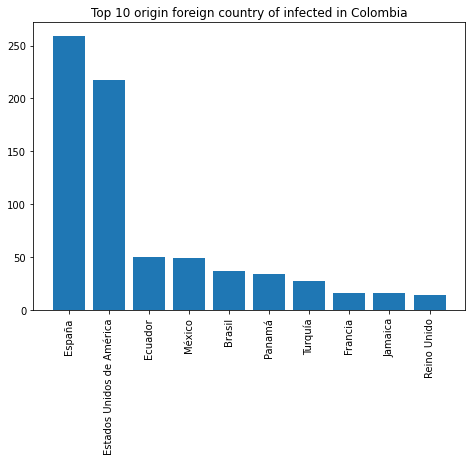

In [146]:
#Top 10 origin foreign country infected in Colombia
originCountry = dfColombia.groupBy('País de procedencia').count().orderBy('count',ascending=False).toPandas()[1:11]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(originCountry['País de procedencia'].values.tolist(),originCountry['count'].values.tolist())
ax.set_title('Top 10 origin foreign country of infected in Colombia')
plt.xticks(rotation=90)
plt.show()


**Colombia vs Mundo**

<BarContainer object of 2 artists>

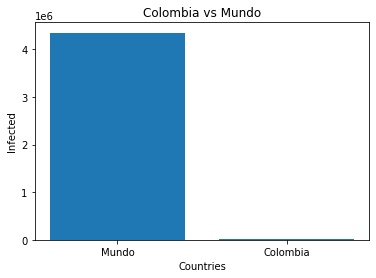

In [275]:
#Colombia vs Mundo - infected
fig,ax = plt.subplots()
totalInfectedColombia = dfGlobalConfirmed.filter((dfGlobalConfirmed['Date'] == LAST_DAY)&(dfGlobalConfirmed['Country/Region']=='Colombia')).select('Country/Region', 'Value').toPandas()
totalInfected = dfGlobalConfirmed.groupBy('Date').sum().orderBy('sum(Value)', ascending=False).toPandas()
x = ['Mundo', 'Colombia']
y = [totalInfected['sum(Value)'][0],totalInfectedColombia['Value'][0]]
ax.set(xlabel='Countries', ylabel='Infected',
       title='Colombia vs Mundo')
ax.bar(x,y)


<BarContainer object of 2 artists>

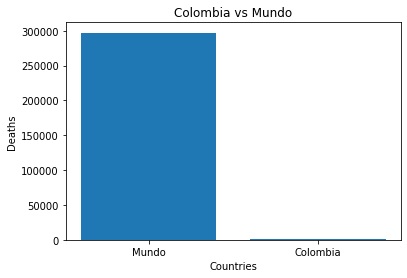

In [296]:
#Colombia vs Mundo  - deaths
fig,ax = plt.subplots()
totalDeathsColombia = dfGlobalDeath.filter((dfGlobalDeath['Date'] == LAST_DAY)&(dfGlobalDeath['Country/Region']=='Colombia')).select('Country/Region', 'Value').toPandas()
totalDeaths = dfGlobalDeath.groupBy('Date').sum().orderBy('sum(Value)', ascending=False).toPandas()
x = ['Mundo', 'Colombia']
y = [totalDeaths['sum(Value)'][0],totalDeathsColombia['Value'][0]]
ax.set(xlabel='Countries', ylabel='Deaths',
       title='Colombia vs Mundo')
ax.bar(x,y)

<BarContainer object of 2 artists>

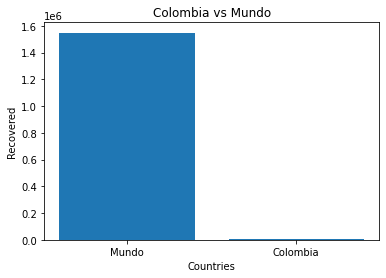

In [304]:
#Colombia vs Mundo - recovered
fig,ax = plt.subplots()
totalRecoveredColombia = dfGlobalRecovered.filter((dfGlobalRecovered['Date'] == LAST_DAY)&(dfGlobalRecovered['Country/Region']=='Colombia')).select('Country/Region', 'Value').toPandas()
totalRecovered = dfGlobalRecovered.groupBy('Date').sum().orderBy('sum(Value)', ascending=False).toPandas()
x = ['Mundo', 'Colombia']
y = [totalRecovered['sum(Value)'][0],totalRecoveredColombia['Value'][0]]
ax.set(xlabel='Countries', ylabel='Recovered',
       title='Colombia vs Mundo')
ax.bar(x,y)